# **SMS Classifier : Develop a text classification model to classify SMS as either spam or non-spam using data science techniques in Python.**

# Loading Libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


# Data Collection

In [2]:
# loading data from csv file to a pandas dataframe

df = pd.read_csv('/content/sms_dataset.csv', encoding='latin-1')

In [3]:
print(df)

        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1044,spam,We know someone who you know that fancies you....,NaN,NaN,NaN
3185,ham,Happy birthday to you....dear.with lots of lov...,NaN,NaN,NaN
3581,ham,You are right. Meanwhile how's project twins c...,NaN,NaN,NaN
2852,ham,I doubt you could handle 5 times per night in ...,NaN,NaN,NaN
3215,spam,URGENT! We are trying to contact U. Todays dra...,NaN,NaN,NaN


In [5]:
# checking the number of rows and columns in the dataframe

df.shape

(5572, 5)

# Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# renaming columns v1 and v2 as Category and Message

df.rename(columns = {'v1' : 'Category', 'v2' : 'Message'}, inplace = True)



# Check if the columns exist before dropping

if 'Unnamed: 2' in df.columns and 'Unnamed: 3' in df.columns and 'Unnamed: 4' in df.columns:
    df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True )
else:
    print("Columns 'Unnamed: 2', 'Unnamed: 3', and/or 'Unnamed: 4' not found in the DataFrame.")


In [8]:
df.sample(5)

,Category,Message
4249,ham,How much for an eighth?
1428,ham,"Tell you what, if you make a little spreadshee..."
1936,ham,My planning usually stops at \find hella weed
2516,ham,Yes.i'm in office da:)
4873,ham,Wat happened to the cruise thing


In [9]:
encoder = LabelEncoder()

In [10]:
df['Category'] = encoder.fit_transform(df['Category'])
df.head()


,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# checking for missing values

df.isnull().sum()

Category    0
Message     0
dtype: int64

In [12]:
# checking for duplicate values

df.duplicated().sum()

403

In [13]:
# remove duplicates

df = df.drop_duplicates(keep = 'first')
df.duplicated().sum()

0

In [14]:
df.shape

(5169, 2)

# Exploratory Data Analysis or EDA

In [15]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
df['Category'].value_counts()

Category
0    4516
1     653
Name: count, dtype: int64

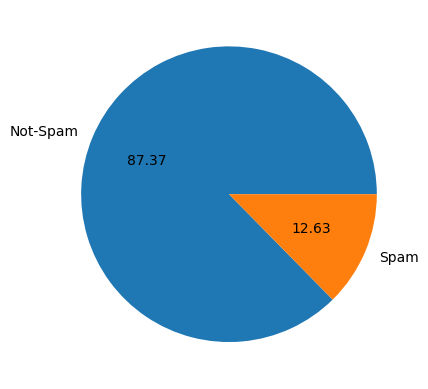

In [17]:
# using matplotlib.pyplot

plt.pie(df['Category'].value_counts(), labels = ['Not-Spam', 'Spam'], autopct = "%0.2f")
plt.show()

In [18]:
# we need to balance the data, as there is excess of Not-Spam SMS over Spam SMS

# using nltk
!pip install nltk

In [19]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [20]:
# creating a column for number of characters

df['num_characters'] = df['Message'].apply(len)
df.head()


# creating a column for word count

df['num_words'] = df['Message'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head()


# creating a column for number of sentences

df['num_sentences'] = df['Message'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,Category,Message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [21]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [22]:
# targeting Not-Spam

df[df['Category'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()


,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [23]:
# targeting Spam

df[df['Category'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: >

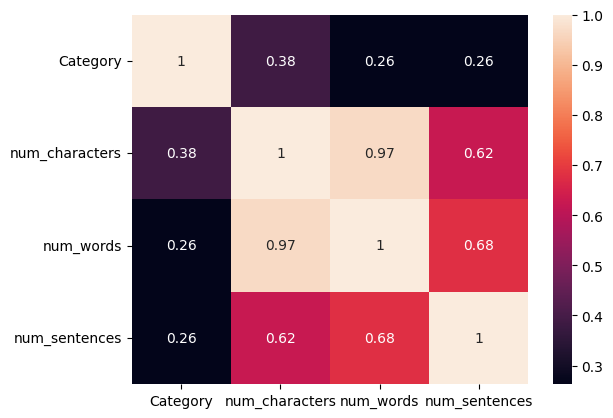

In [24]:
# Convert the 'Category' column to numeric type

df['Category'] = df['Category'].astype(int)

# Calculate correlation only on numerical columns

numerical_df = df.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr(), annot=True)

# Data Pre-Processing

In [25]:
# downloading the stopword dataset

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [26]:
ps = PorterStemmer()

In [27]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [28]:
# tranform text trial

transformed_text = transform_text("Is that seriously how you spell his name?")
print(transformed_text)

serious spell name


In [29]:
df['Message'][20]

'Is that seriously how you spell his name?'

In [30]:
ps.stem('jogging')

'jog'

In [31]:
df['transformed_text'] = df['Message'].apply(transform_text)
df.head()

,Category,Message,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [32]:
spam_corpus = []
for msg in df[df['Category'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


len(spam_corpus)

9939

In [33]:
 notspam_corpus = []
 for msg in df[df['Category'] == 0]['transformed_text'].tolist():
     for word in msg.split():
         notspam_corpus.append(word)


len(notspam_corpus)

35404

In [34]:
# vectorization of text

df.head()

,Category,Message,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# Building the Model

In [35]:
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [36]:
# Apply tfidf transformation and convert to a dense array
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [37]:
X.shape

(5169, 3000)

In [38]:
Y = df['Category'].values

Spliting data into "Train data" & "Test data"

In [39]:
# Assuming 'X' & 'Y' are feature & target variables respectively

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)  # Adjust test_size and random_state as needed


In [40]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [41]:
gnb.fit(X_train, Y_train)
Y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test, Y_pred1))
print(confusion_matrix(Y_test, Y_pred1))
print(precision_score(Y_test, Y_pred1))


0.880123743232792
[[991 130]
 [ 25 147]]
0.5306859205776173


In [42]:
mnb.fit(X_train, Y_train)
Y_pred2 = mnb.predict(X_test)
print(accuracy_score(Y_test, Y_pred2))
print(confusion_matrix(Y_test, Y_pred2))
print(precision_score(Y_test, Y_pred2))


0.9721577726218097
[[1121    0]
 [  36  136]]
1.0


In [43]:
bnb.fit(X_train, Y_train)
Y_pred3 = bnb.predict(X_test)
print(accuracy_score(Y_test, Y_pred3))
print(confusion_matrix(Y_test, Y_pred3))
print(precision_score(Y_test, Y_pred3))


0.9783449342614076
[[1120    1]
 [  27  145]]
0.9931506849315068


In [44]:
!pip install xgboost

In [45]:
lrc = LogisticRegression(solver='liblinear', penalty='l1')
svc = SVC(kernel='sigmoid', gamma=1.0)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
mnb = MultinomialNB()
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)


In [46]:
clfs = {
    'LR' : lrc,
    'SVC' : svc,
    'RF' : rfc,
    'MNB' : mnb,
    'KN' : knc,
    'DT' : dtc
}

In [47]:
def train_classifier(clf, X_train, Y_train, X_test, Y_test):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)

    return accuracy, precision

In [48]:
train_classifier(svc,X_train,Y_train,X_test,Y_test)

(0.9752513534416086, 0.972972972972973)

In [49]:
accuracy_scores = {}
precision_scores = {}

for name, clf in clfs.items():
    accuracy, precision = train_classifier(clf, X_train, Y_train, X_test, Y_test)

    print("For ", name)
    print("Accuracy - ", accuracy)
    print("Precision - ", precision)

    accuracy_scores[name] = accuracy
    precision_scores[name] = precision


For  LR
Accuracy -  0.9636504253673627
Precision -  0.9629629629629629
For  SVC
Accuracy -  0.9752513534416086
Precision -  0.972972972972973
For  RF
Accuracy -  0.9760247486465584
Precision -  0.9862068965517241
For  MNB
Accuracy -  0.9721577726218097
Precision -  1.0
For  KN
Accuracy -  0.9149265274555298
Precision -  1.0
For  DT
Accuracy -  0.9334880123743233
Precision -  0.8257575757575758


In [50]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy':accuracy_scores.values(), 'Precision':precision_scores.values()})
performance_df

,Algorithm,Accuracy,Precision
0,LR,0.963650,0.962963
1,SVC,0.975251,0.972973
2,RF,0.976025,0.986207
3,MNB,0.972158,1.000000
4,KN,0.914927,1.000000
5,DT,0.933488,0.825758


# Improving the Model

In [52]:
#changing the max_features parameter of Tfidf

temp_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy_max_ft_3000':accuracy_scores.values(), 'Precision_max_ft_3000':precision_scores.values()})

# Using the dictionaries accuracy_scores and precision_scores instead of the functions

temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores.values(),'Precision_scaling':precision_scores.values()}).sort_values('Precision_scaling',ascending=False)
new_df = performance_df.merge(temp_df, on = 'Algorithm')

new_df_scaled = new_df.merge(temp_df, on = 'Algorithm')

temp_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy_num_chars':accuracy_scores.values(), 'Precision_num_chars':precision_scores.values()})

new_df_scaled.merge(temp_df, on = 'Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,LR,0.963650,0.962963,0.963650,0.962963,0.963650,0.962963,0.963650,0.962963
1,SVC,0.975251,0.972973,0.975251,0.972973,0.975251,0.972973,0.975251,0.972973
2,RF,0.976025,0.986207,0.976025,0.986207,0.976025,0.986207,0.976025,0.986207
3,MNB,0.972158,1.000000,0.972158,1.000000,0.972158,1.000000,0.972158,1.000000
4,KN,0.914927,1.000000,0.914927,1.000000,0.914927,1.000000,0.914927,1.000000
5,DT,0.933488,0.825758,0.933488,0.825758,0.933488,0.825758,0.933488,0.825758


In [53]:
# voting classifier : as to check the precision

svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()

from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('etc', etc)], voting='soft')


In [57]:
voting.fit(X_train, Y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('etc',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [59]:
Y_pred = voting.predict(X_test)
print("Accuracy", accuracy_score(Y_test, Y_pred))
print("Precision", precision_score(Y_test, Y_pred))

Accuracy 0.9845320959010054
Precision 0.9935064935064936


In [78]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [70]:
# Saving and training the Tfidf & Naive-Bayes Vectorizers
with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf, vectorizer_file)

with open('model.pkl', 'wb') as model_file:
    pickle.dump(mnb, model_file)